11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7391 - loss: 0.8279 - val_accuracy: 0.9751 - val_loss: 0.0861
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9631 - loss: 0.1237 - val_accuracy: 0.9837 - val_loss: 0.0591
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9732 - loss: 0.0896 - val_accuracy: 0.9860 - val_loss: 0.0503
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9783 - loss: 0.0721 - val_accuracy: 0.9870 - val_loss: 0.0454
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9818 - loss: 0.0609 - val_accuracy: 0.9877 - val_loss: 0.0430
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9848 - loss: 0.0511 - val_accuracy: 0.9887 - val_loss: 0.0418
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9868 - loss: 0.0450 - val_accuracy: 0.9898 - val_loss: 0.0360
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9872 - loss: 0.0427 - val_accuracy: 0.

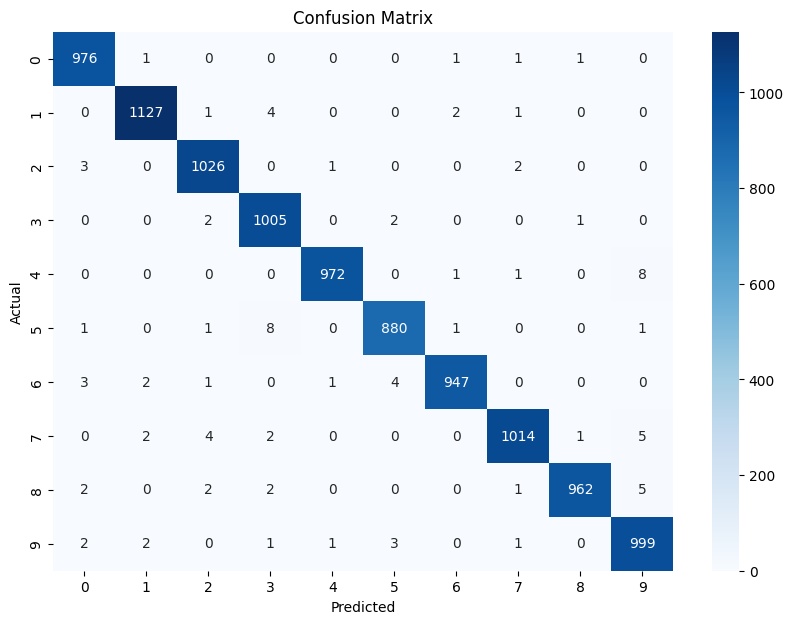

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = [x.reshape(-1, 28, 28, 1).astype('float32') / 255 for x in (x_train, x_test)]
y_train, y_test = [to_categorical(y, 10) for y in (y_train, y_test)]

# Define and compile model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=200, validation_split=0.2)

# Evaluate model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}\nTest accuracy: {acc:.4f}')

# Predictions and evaluation
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred))